In [ ]:
%load_ext autoreload
%autoreload 2


In [7]:
from src.data_loader import read_data

train_data = read_data('train')
val_data = read_data('val')
test_data = read_data('test')

100%|██████████| 200/200 [00:00<00:00, 4663.50it/s]


In [8]:
import clip.clip as clip 

CLIP_MODEL,  clip_img_processor =clip.load('ViT-B/32', jit=False)

In [9]:
from src.config import BATCH_SIZE
import random 
import numpy as np 
import torch 

from src.networks.CLIP_distilBERT import CLIP_dBERT_dataset

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
g = torch.Generator()
g.manual_seed(0)

def get_dataloader(data):
    dataset = CLIP_dBERT_dataset(data, clip_img_processor)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,shuffle=True, worker_init_fn=seed_worker, generator=g)
    return data_loader
    
train_loader = get_dataloader(train_data)
val_loader = get_dataloader(val_data)
test_loader = get_dataloader(test_data)

CLIP preprocessing: 100%|██████████| 200/200 [00:02<00:00, 67.56it/s]


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2/2 [00:01<00:00,  1.22it/s]




For epoch = 0
Training Loss = 0.6032936505296014 | Training Accuracy = 0.0014204545454545455
Validation Loss = 0.5093910992145538|Validation Accuracy = 0.04788306451612903




100%|██████████| 2/2 [00:01<00:00,  1.18it/s]




For epoch = 1
Training Loss = 0.40823155506090686 | Training Accuracy = 0.12679924242424243
Validation Loss = 0.4014285206794739|Validation Accuracy = 0.07862903225806452




100%|██████████| 2/2 [00:01<00:00,  1.12it/s]




For epoch = 2
Training Loss = 0.3003747740929777 | Training Accuracy = 0.15520833333333334
Validation Loss = 0.34783612191677094|Validation Accuracy = 0.07913306451612903




100%|██████████| 2/2 [00:01<00:00,  1.04it/s]




For epoch = 3
Training Loss = 0.2622930739413608 | Training Accuracy = 0.16410984848484847
Validation Loss = 0.30987657606601715|Validation Accuracy = 0.09526209677419355




100%|██████████| 2/2 [00:01<00:00,  1.04it/s]




For epoch = 4
Training Loss = 0.25548012486912985 | Training Accuracy = 0.1740530303030303
Validation Loss = 0.28967228531837463|Validation Accuracy = 0.12752016129032256




100%|██████████| 2/2 [00:01<00:00,  1.00it/s]




For epoch = 5
Training Loss = 0.2653628492897207 | Training Accuracy = 0.20975378787878787
Validation Loss = 0.2796763777732849|Validation Accuracy = 0.11139112903225806




100%|██████████| 2/2 [00:01<00:00,  1.02it/s]




For epoch = 6
Training Loss = 0.2829880159009587 | Training Accuracy = 0.19128787878787878
Validation Loss = 0.2784932404756546|Validation Accuracy = 0.11038306451612903




100%|██████████| 2/2 [00:02<00:00,  1.02s/it]




For epoch = 7
Training Loss = 0.2861744930798357 | Training Accuracy = 0.21060606060606063
Validation Loss = 0.28386548161506653|Validation Accuracy = 0.12701612903225806




100%|██████████| 2/2 [00:02<00:00,  1.02s/it]




For epoch = 8
Training Loss = 0.2907901501113718 | Training Accuracy = 0.24895833333333336
Validation Loss = 0.29776982963085175|Validation Accuracy = 0.12651209677419356




100%|██████████| 2/2 [00:02<00:00,  1.04s/it]




For epoch = 9
Training Loss = 0.2999797280539166 | Training Accuracy = 0.225
Validation Loss = 0.29903966188430786|Validation Accuracy = 0.12651209677419356




100%|██████████| 2/2 [00:02<00:00,  1.06s/it]




For epoch = 10
Training Loss = 0.2992134094238281 | Training Accuracy = 0.20653409090909092
Validation Loss = 0.2962944805622101|Validation Accuracy = 0.12701612903225806




100%|██████████| 2/2 [00:02<00:00,  1.07s/it]




For epoch = 11
Training Loss = 0.2927978370677341 | Training Accuracy = 0.22926136363636365
Validation Loss = 0.30224643647670746|Validation Accuracy = 0.12600806451612903




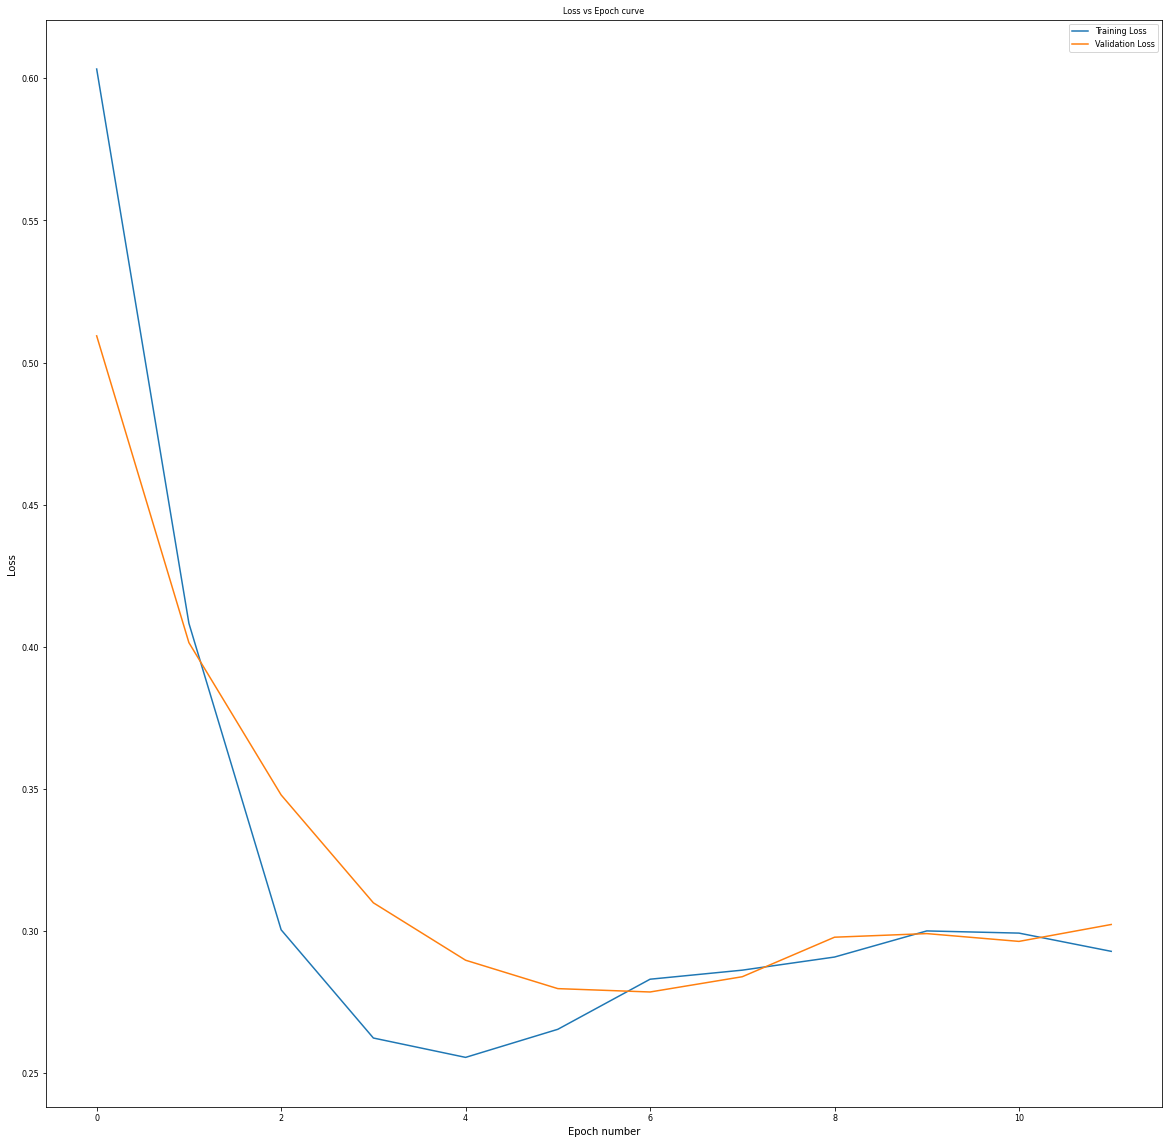

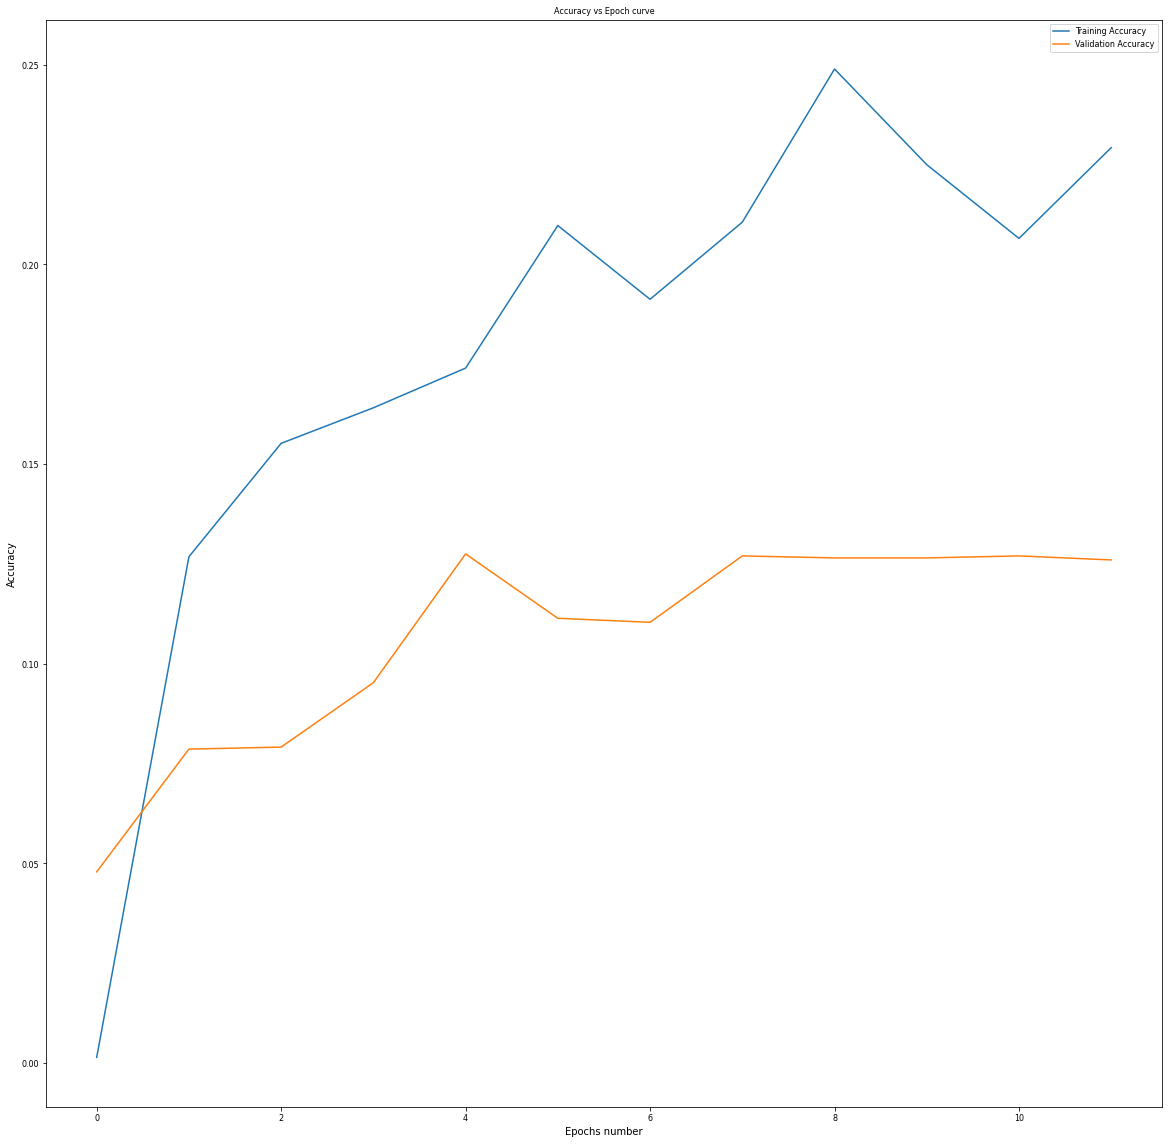

In [10]:
from src.trainer import Trainer
from src.networks.CLIP_distilBERT import CLIP_dBERT_Input_transformer, CLIP_dBERT_Model
import torch.nn as nn
import torch 

trainer = Trainer(12)

#Set data
trainer.set_data(train_loader, val_loader)

#set model 
model = CLIP_dBERT_Model(CLIP_MODEL).cuda()
input_transformer = CLIP_dBERT_Input_transformer()
trainer.set_model(model, input_transformer)

#Backpropagation
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
trainer.set_optimizer(optimizer, loss_fn)
trainer.train(l2_r=1e-3)
trainer.plot()

In [11]:
trainer.test(test_loader)

100%|██████████| 22/22 [00:22<00:00,  1.04s/it]

Accuracy Score = 28.093158660844253
Macro F1 score Score = 15.113188773571748
Micro F1 score Score = 65.30025170801869


In [ ]:
torch.save(model.state_dict(), f"Models/CLIP_distilBERT.model")
